In [1]:
from collections import namedtuple, Counter
from itertools import accumulate
import random
import math
import requests
from io import StringIO
from matplotlib import pyplot as plt

Phrase = namedtuple('Phrase', ['hans', 'pinyin', 'rank'])

In [2]:
DICT_URL = 'https://gist.githubusercontent.com/indiejoseph/eae09c673460aa0b56db/raw'
resp = requests.get(DICT_URL)

In [3]:
full_phrases = []
for line in StringIO(resp.text):
    if '\t' not in line:
        continue
    phrase, pinyin, rank = line.strip().split('\t')
    pinyin = ''.join(filter(lambda c: c.isalpha(), pinyin)).lower()
    rank = int(rank)
    full_phrases.append(Phrase(phrase, pinyin, rank))
full_phrases = sorted(full_phrases, key=lambda p: p.rank)
print(f"{len(full_phrases)} phrases loaded")

56064 phrases loaded


In [4]:
pinyins = set()
phrases = []
for phrase in full_phrases[:15038]:
    if phrase.pinyin in pinyins:
        continue
    pinyins.add(phrase.pinyin)
    phrases.append(phrase)
print(f"{len(phrases)} phrases remaining")

11163 phrases remaining


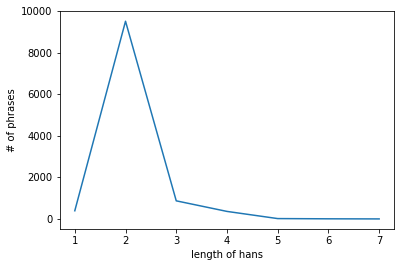

In [5]:
hanlens = Counter(len(p.hans) for p in phrases)
x, y = zip(*sorted(hanlens.items()))
plt.xlabel('length of hans')
plt.ylabel('# of phrases')
plt.plot(x, y)
plt.show()

In [6]:
phrases = [p for p in phrases if len(p.hans) == 2]
print(f"{len(phrases)} phrases remaining")

9513 phrases remaining


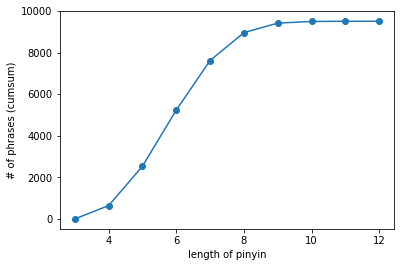

In [7]:
pylens = Counter(len(p.pinyin) for p in phrases)
x, y = zip(*sorted(pylens.items()))
y = list(accumulate(y))
plt.xlabel('length of pinyin')
plt.ylabel('# of phrases (cumsum)')
plt.plot(x, y, marker='o')
plt.show()

In [8]:
phrases = [p for p in phrases if len(p.pinyin) <= 8]
phrases = sorted(phrases, key=lambda p: len(p.pinyin))
print(f"{len(phrases)} phrases remaining")

8964 phrases remaining


In [9]:
random.choices(phrases, k=4)

[Phrase(hans='射箭', pinyin='shejian', rank=13166),
 Phrase(hans='自称', pinyin='zicheng', rank=6091),
 Phrase(hans='互访', pinyin='hufang', rank=6896),
 Phrase(hans='匣子', pinyin='xiazi', rank=13617)]

In [10]:
e = math.log2(len(phrases) ** 4)
n = math.log(2 ** e) / math.log(26 * 2 + 10)
print(f'entropy = {e:.1f} bits')
print(f'        = {n:.1f} chars')

entropy = 52.5 bits
        = 8.8 chars


In [11]:
with open('dict.txt', 'w', encoding='utf8') as f:
    for p in phrases:
        f.write(f'{p.hans}\t{p.pinyin}\n')